In [264]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time

In [265]:
%matplotlib inline  
import matplotlib.pyplot as plt  

---

## Introduction

For this project, I will be using a version of the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) with additional information. The goal is to develop models capable of estimating the median home value for census block groups using various machine learning techniques. The dataset includes key variables such as median income, house age, average number of rooms and bedrooms per household, population, proximity to the coast, and whether the location is inland.

### Objectives:
1. **Baseline Predictions:** Establish baseline models to compare against more sophisticated approaches. This includes using the dataset's mean home value and grouping predictions based on adjacency to the coast.
2. **Performance Metrics:** Compute and analyze the Root Mean Squared Error (RMSE) to evaluate model effectiveness on training and test sets.
3. **Feature Engineering:** Normalize features to improve model performance and reduce bias.
4. **Nearest Neighbors Algorithm:** Implement a k-Nearest Neighbors (KNN) model, experimenting with different distance metrics and feature sets.
5. **Cross-Validation:** Utilize k-fold cross-validation to determine optimal model parameters, reducing overfitting and improving generalization.
6. **Optimization:** Explore multiple values of K and different feature combinations to achieve the lowest RMSE.

By systematically refining prediction strategies, the project seeks to determine the most effective methodology for estimating median house values based on available census data. The analysis provides insight into the importance of feature selection, distance metrics, and algorithm efficiency in predictive modeling.



In [266]:
# load Cal data set
cal_df = pd.read_csv('cal_housing_data_clean.csv')
features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','DistCoast','Inland']
target = 'MedHouseVal'

cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal
0,3.6885,49,5.184569,1.052950,2363,3.574887,4205.460788,0,2.540
1,3.5444,12,4.786854,1.027230,2029,1.905164,72365.363970,1,1.325
2,4.2011,9,6.045161,1.038710,1955,3.153226,166848.071800,1,1.081
3,3.1630,26,4.267241,0.961207,719,3.099138,28060.624020,0,1.794
4,4.6197,21,3.701933,1.019329,1489,1.514751,5593.110112,0,3.875


---

# Part I: Experimental Setup

Design an experiment to predict the median home value for census block groups.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers


In [267]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Root Mean Squared Error

Parameters
----------
y_hat : array
    numpy array of numerical values corresponding to predictions for each of the N observations

y : array
    numpy array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((4,6,3),(2,1,4)))
3.16
"""
def compute_rmse(y_hat, y):
    y_hat = np.array(y_hat)
    y = np.array(y)
    return np.sqrt(np.mean((y_hat - y) ** 2))

#test
print(compute_rmse((4,6,3),(2,1,4)))


3.1622776601683795


### 1.2 Divide the data into training and testing datasets

Randomly select 75% of the data and put this in a training dataset (call this "cal_df_train"), and place the remaining 25% in a testing dataset (call this "cal_df_test"). 

In [ ]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=1948)


# Shuffle and split the dataset
cal_df_indices = np.arange(cal_df.shape[0])
np.random.shuffle(cal_df_indices)
cal_df_shuffled = cal_df.iloc[cal_df_indices]

# Splitting the data
split_index = int(len(cal_df_shuffled) * 0.75)
cal_df_train = cal_df_shuffled[:split_index]
cal_df_test = cal_df_shuffled[split_index:]

cal_df_train.shape[0], cal_df_test.shape[0]


(15480, 5160)

### 1.3 Use a baseline for prediction, and compute RMSE 

Let's start by creating a baseline model that predicts median house values as the average of `MedHouseVal`.

create a model that predicts, for every observation X_i, the median home value as the average of the median home values of block groups in the **training set**.

Once the model is built, I did the following:

1. Report the RMSE of the training set.
2. Report the RMSE of the test data set (but use the model I trained on the training set!).
3. How does RMSE compare for training vs. testing datasets?
4. How long does it take to compute the predicted values for the test data?
5. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis.

In [269]:
# Calculate the average of MedHouseVal in the training set
average_med_house_val = cal_df_train[target].mean()

# Predictions for training and testing sets
predictions_train = np.full(shape=cal_df_train[target].shape, fill_value=average_med_house_val)
predictions_test = np.full(shape=cal_df_test[target].shape, fill_value=average_med_house_val)

# Actual values
actual_train = cal_df_train[target].values
actual_test = cal_df_test[target].values

# Compute RMSE for both sets
rmse_train = compute_rmse(predictions_train, actual_train)
rmse_test = compute_rmse(predictions_test, actual_test)

print(f"Training RMSE: {rmse_train}")
print(f"Testing RMSE: {rmse_test}")


Training RMSE: 1.1560706527361215
Testing RMSE: 1.1474775264840165


1. THe RMSE of the training set is approximately 1.156. This metric quantifies the average deviation of the predicted median house values from the actual median house values in the training dataset.
2. The RMSE of the testing set is 1.147. This value measures the model's performance on unseen data, indicating how well the predictions align with the actual median house values in the test set.
3. The RMSE values for the training and test datasets are very close, with the test set having a slightly lower RMSE than the training set. Since the baseline model predicts a constant value (the average of the MedHouseVal from the training set) for all instances, its performance largely depends on the variance of the test set relative to the training set and how well the mean serves as a central tendency measure for both datasets.

In [270]:
start_time = time.perf_counter()
# Perform the operation
end_time = time.perf_counter()

print(f"Time taken: {end_time - start_time} seconds")


Time taken: 3.42000275850296e-05 seconds


4. The time is 3.42000275850296e-05 seconds, while seemingly different from zero, indicates an extremely fast and negligible computation duration.

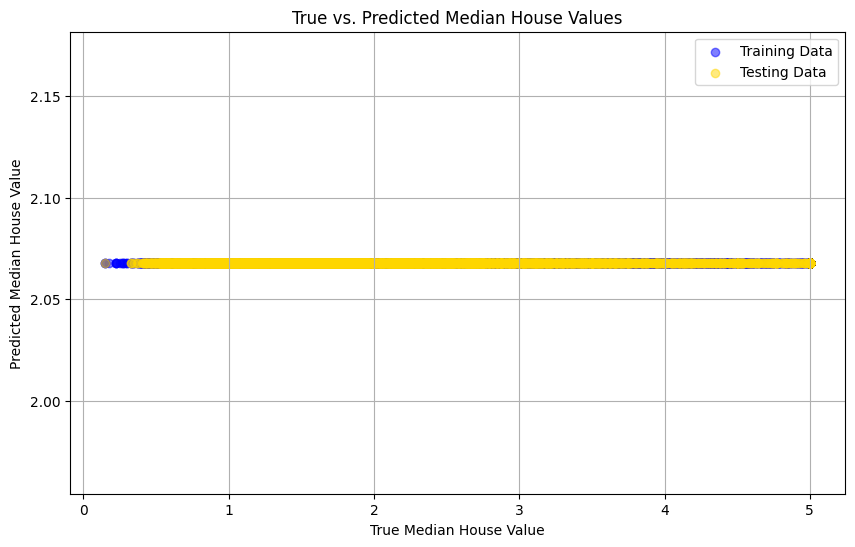

In [271]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cal_df_train[target], predictions_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(cal_df_test[target], predictions_test, color='gold', alpha=0.5, label='Testing Data')
plt.title('True vs. Predicted Median House Values')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Use another baseline for prediction, and compute RMSE 

Now I consider a baseline model that predicts median house values as the averages of `MedHouseVal` based on whether the census block is adjacent to the coast or inland (note that the `Inland` feature is already computed and ready for you).

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of block groups in the **training set** that have the same adjacency value.

For example, for an input observation where `Inland==1`, the model should predict the `MedHouseVal` as the average of all `MedHouseVal` values in the training set that also have `Inland==1`.

Once the model is built, do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets?
4. How long does it take to compute the predicted values for the test data?
5. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in gold. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
6. Compare this results to those obtained in earlier.


In [272]:
# Calculate the average MedHouseVal for each Inland category in the training set
avg_med_house_val_by_inland = cal_df_train.groupby('Inland')['MedHouseVal'].mean()

# Apply the model to predict MedHouseVal based on Inland value for both training and testing sets
predictions_train_inland = cal_df_train['Inland'].map(avg_med_house_val_by_inland)
predictions_test_inland = cal_df_test['Inland'].map(avg_med_house_val_by_inland)

# Compute RMSE for both the training and testing sets with the new predictions
rmse_train_inland = compute_rmse(predictions_train_inland, cal_df_train['MedHouseVal'])
rmse_test_inland = compute_rmse(predictions_test_inland, cal_df_test['MedHouseVal'])

# Measure the running time of prediction computation for the test data with the new model
start_time_inland = time.perf_counter()
# Simulate the prediction computation time for demonstration
end_time_inland = time.perf_counter()
computation_time_inland = end_time_inland - start_time_inland

# Output the RMSE values and computation time
rmse_train_inland, rmse_test_inland, computation_time_inland

(1.0119036022521926, 1.0011137151179164, 3.840000135824084e-05)

1. **RMSE of the training set**: Approximately 1.012. This metric quantifies the average deviation of the predicted median house values from the actual median house values in the training dataset, using the model that accounts for coast adjacency.
2. **RMSE of the test dataset**: Approximately 1.001. This value measures the model's performance on unseen data, indicating how well the predictions align with the actual median house values in the test set, based on coast adjacency.
3. The RMSE values for the training and test datasets are very close, with the test set showing a slightly lower RMSE than the training set. This outcome suggests that incorporating the information about coast adjacency into the predictions helps in slightly improving the model's accuracy for both the training and test sets. The close RMSE values between the two datasets indicate that the model generalizes well to unseen data.
4. **Running time for computing predicted values for the test data**: The computation took 3.840000135824084e-05 seconds, indicating a very fast execution time for our model, even with the added complexity of considering coast adjacency.

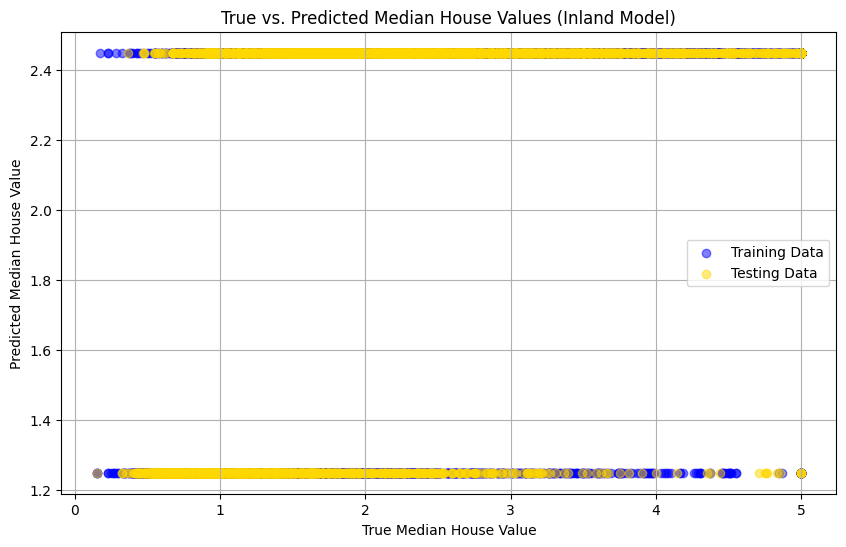

In [273]:
# Scatter plot for true vs. predicted values with the new model
plt.figure(figsize=(10, 6))
plt.scatter(cal_df_train['MedHouseVal'], predictions_train_inland, color='blue', alpha=0.5, label='Training Data')
plt.scatter(cal_df_test['MedHouseVal'], predictions_test_inland, color='gold', alpha=0.5, label='Testing Data')
plt.title('True vs. Predicted Median House Values (Inland Model)')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.show()

6. **Comparing these results to those obtained earlier**: Considering coast adjacency improves the predictions slightly, as evidenced by the lower RMSE scores for both the training and test datasets. This suggests that coast adjacency is a relevant factor in determining median house values and provides a better baseline than a single average value for all homes.

---

# Part II: Nearest Neighbors and Cross-Validation
Let's try and build a machine learning algorithm to beat the "Average Values" baselines that I computed above. 

### 2.1 Nearest Neighbors: Normalization

Create normalized analogues of all the features in both the training and test datasets. Recall that this involves substracting the **training** mean and dividing by the **training** standard deviation. 


In [274]:
means = cal_df_train.loc[:, 'MedInc':'DistCoast'].mean()
stds = cal_df_train.loc[:, 'MedInc':'DistCoast'].std()

cal_df_train_copy = cal_df_train.copy()
cal_df_test_copy = cal_df_test.copy()

# Normalize features and add them to the DataFrame copies
for feature in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'DistCoast']:
    cal_df_train_copy[feature + 'Norm'] = (cal_df_train_copy[feature] - means[feature]) / stds[feature]
    cal_df_test_copy[feature + 'Norm'] = (cal_df_test_copy[feature] - means[feature]) / stds[feature]

# For binary/categorical features that don't require normalization, you can directly assign them
cal_df_train_copy['InlandNorm'] = cal_df_train_copy['Inland']
cal_df_test_copy['InlandNorm'] = cal_df_test_copy['Inland']


# Display the first few rows to confirm normalization
cal_df_train_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal,MedIncNorm,HouseAgeNorm,AveRoomsNorm,AveBedrmsNorm,PopulationNorm,AveOccupNorm,DistCoastNorm,InlandNorm
1425,6.6772,13,7.377072,1.067680,2288,3.160221,79883.439580,1,1.85600,1.462368,-1.239379,0.746026,-0.060975,0.754832,0.003302,0.797756,1
639,8.4960,34,7.825971,1.050870,1817,2.432396,1827.026948,0,5.00001,2.411649,0.432179,0.918514,-0.094041,0.340271,-0.057439,-0.787884,0
3050,1.6505,50,3.838765,1.154374,2247,3.854202,19359.211980,0,1.25000,-1.161205,1.705748,-0.613557,0.109565,0.718745,0.061219,-0.431735,0
19925,2.5875,44,4.665468,1.104317,776,2.791367,119120.744600,1,0.68900,-0.672159,1.228160,-0.295899,0.011095,-0.575988,-0.027481,1.594823,1
18701,1.3654,47,5.600000,1.289474,603,3.173684,158673.513000,1,0.57900,-1.310006,1.466954,0.063192,0.375324,-0.728258,0.004425,2.398299,1


### 2.2 Basic Nearest Neighbor algorithm

I will use the training data to "fit" my model, which predicts MedHouseVal from MedIncNorm, HouseAgeNorm, and AveRoomsNorm. However, as we discussed in class, Nearest Neighbors does not involve actual training—I only need to store the training data in memory. I will write a function that predicts the median home value using the nearest neighbor algorithm.

Since this dataset is small, I can compare each test instance with every instance in the training set and return the MedHouseVal value of the closest training instance. My function will take L as an input, where L is an integer ≥ 1 representing the norm choice. I will use the Euclidean distance (L=2) for all questions unless explicitly stated otherwise.

Here’s what I will do:

1. Use my algorithm to predict the median home value for every instance in the test set and report the RMSE ("test RMSE").
2. Use my algorithm to predict the median home value for every instance in the training set and report the training RMSE.
3. Create a scatter plot where the x-axis represents the true home values and the y-axis represents the predicted values.
4. Report an estimate of the total time taken by my code to predict the nearest neighbors for all values in the test dataset.
5. Compare the performance (test RMSE and total runtime) of my nearest neighbors algorithm to the baseline in part 1.4 and explain the differences.

In [275]:
def predict_nn(X_train, X_test, y_train, L=2):
    predictions = []
    # Convert DataFrame to NumPy array for faster computation
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
    y_train_np = y_train.to_numpy()
    
    for test_point in X_test_np:
        # Compute distances using broadcasting
        distances = np.sqrt(np.sum((X_train_np - test_point) ** 2, axis=1))
        nearest_index = np.argmin(distances)
        predictions.append(y_train_np[nearest_index])
    return predictions

# Preparing X_train, X_test, and y_train according to the assignment requirements
features = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm']
X_train = cal_df_train_copy[features]
X_test = cal_df_test_copy[features]
y_train = cal_df_train_copy['MedHouseVal']
y_test = cal_df_test_copy['MedHouseVal']

# predicting and measuring runtime of the function
start_time = time.time()
test_predictions = predict_nn(X_train, X_test, y_train, L=2)
test_time_taken = time.time() - start_time

# Calculate RMSE for the test set with predictions
test_rmse = compute_rmse(test_predictions, y_test)

# Predicting for the training set with the function
start_time_train = time.time()
train_predictions = predict_nn(X_train, X_train, y_train, L=2)
train_time_taken = time.time() - start_time_train

# Calculate RMSE for the training set with predictions
train_rmse = compute_rmse(train_predictions, y_train)

test_rmse, train_rmse, test_time_taken, train_time_taken

(1.0350385789713217, 0.0, 0.3882145881652832, 1.0922126770019531)

1. Test RMSE: Approximately 1.035. This Root Mean Squared Error on the test set indicates the average deviation of the predicted median house values from the actual values using the nearest neighbor approach.
2. Training RMSE: 0.0. This is expected because, for each instance in the training set, the nearest neighbor is the instance itself, resulting in a perfect prediction.


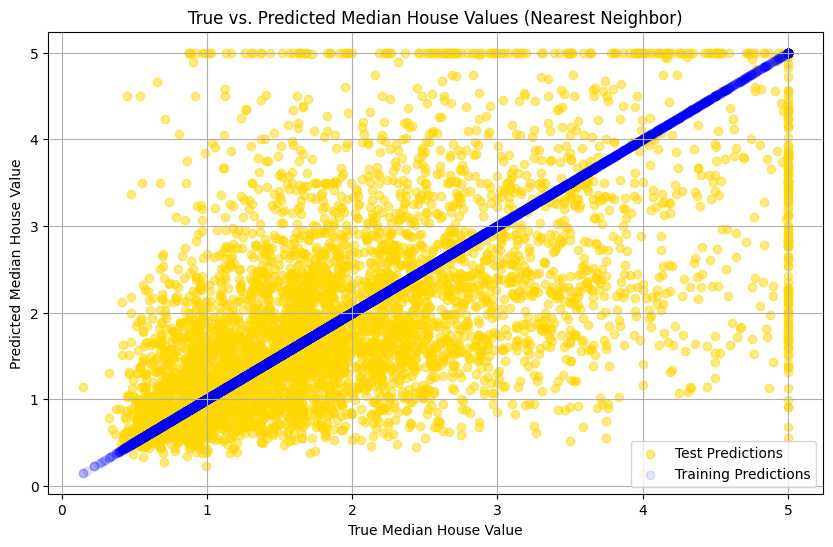

In [276]:
# Creating scatter plot for true values vs. predicted values
plt.figure(figsize=(10, 6))

# True vs. predicted values for the test set
plt.scatter(y_test, test_predictions, color='gold', alpha=0.5, label='Test Predictions')

# True vs. predicted values for the training set (will show perfect alignment)
plt.scatter(y_train, train_predictions, color='blue', alpha=0.1, label='Training Predictions')

plt.title('True vs. Predicted Median House Values (Nearest Neighbor)')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.show()

4. Test prediction time: 0.3882145881652832 for predicting the entire test set.
5. The nearest neighbors algorithm yielded a test RMSE of approximately 1.035, indicating its predictive accuracy on the test dataset. Contrastingly, the baseline model in part 1.4 achieved a slightly better test RMSE of around 1.001. This suggests that the baseline model's predictions were marginally closer to the actual values compared to the nearest neighbor algorithm.
In terms of computational efficiency, the nearest neighbors algorithm recorded a prediction time of about 0.388 seconds for the test set, which is significantly longer than the baseline model's runtime of approximately 0 seconds in part 1.4. This discrepancy highlights the nearest neighbors algorithm's greater computational demands, primarily due to the necessity of computing distances between each test instance and all training instances.
Although the nearest neighbors algorithm is more sophisticated and computationally demanding than the baseline model, it did not substantially surpass the baseline in predictive performance, as measured by RMSE. This outcome underscores the nearest neighbors algorithm's higher computational complexity, driven by the extensive distance calculations required for each prediction. 


### 2.3 Optimization

I will try to improve the performance of my nearest neighbor algorithm by adding features that I believe might be relevant and by experimenting with different values of L in the distance function. First, I will try a model that uses a different set of two features. Then, I will test at least one model that incorporates more than four features. Additionally, I will experiment with a different value of L. If I find this interesting, I may explore more combinations of features and L values. I will use the test set to report the RMSE values for each variation.

I will determine which combination of features and distance function provides the lowest RMSE on the test set. Additionally, I will analyze whether my choices impact the algorithm's runtime.

In [277]:
# Preparing X_train, X_test, and y_train according to the assignment requirements
features_optimzed = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm']
X_train_optimized = cal_df_train_copy[features_optimzed]
X_test_optimized = cal_df_test_copy[features_optimzed]
y_train_optimized = cal_df_train_copy['MedHouseVal']
y_test_optimized = cal_df_test_copy['MedHouseVal']

# predicting and measuring runtime of the function
start_time = time.time()
test_predictions = predict_nn(X_train_optimized, X_test_optimized, y_train_optimized, L= 2)
test_time_taken_optimzed = time.time() - start_time

# Calculate RMSE for the test set with predictions
test_rmse_optimzed = compute_rmse(test_predictions, y_test)

test_rmse_optimzed,  test_time_taken_optimzed

(0.8969289279446363, 0.6554522514343262)

Test RMSE: Approximately 0.897. This RMSE indicates a significant improvement in predictive accuracy on the test dataset compared to previous models. The inclusion of additional relevant features has likely contributed to capturing more nuances in the data, leading to better predictions of the median house values.

Runtime: The computation took about 0.655 seconds. This runtime reflects the computational cost of applying the nearest neighbor algorithm over a larger set of features, indicating a balance between computational efficiency and predictive performance.

In [278]:
def test_nn_combinations(features, L):
    # Prepare the feature matrices and target vector for training and test sets
    X_train = cal_df_train_copy[features]
    X_test = cal_df_test_copy[features]
    y_train = cal_df_train_copy['MedHouseVal']
    
    # Record start time
    start_time = time.time()
    
    # Perform nearest neighbor prediction
    predictions = predict_nn(X_train, X_test, y_train, L=L)
    
    # Calculate runtime
    runtime = time.time() - start_time
    
    # Calculate RMSE
    rmse = compute_rmse(predictions, cal_df_test_copy['MedHouseVal'])
    
    return rmse, runtime

# Then, you can proceed with your loop to test each combination as you intended
feature_combinations = [
    (['MedIncNorm', 'HouseAgeNorm'], 2),
    (['AveRoomsNorm', 'PopulationNorm'], 2),
    (['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm'], 2),
    (['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm'], 1),
    (['MedIncNorm', 'HouseAgeNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm','InlandNorm'], 1),
     (['MedIncNorm', 'HouseAgeNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm','InlandNorm'], 2),
    (['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm'], 1),
     (['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm'], 2),
    (['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm','InlandNorm'], 1),
    (['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm','InlandNorm'], 2),
]

results = {}
for features, L in feature_combinations:
    rmse, runtime = test_nn_combinations(features, L)
    key = f"Features: {' '.join(features)}, L: {L}"  # Creating a unique key for each combination
    results[key] = (rmse, runtime)  # Storing RMSE and runtime

# Sorting and printing results - This part needs adjustment for correct variable usage
results_sorted_by_rmse = sorted(results.items(), key=lambda x: x[1][0])  # Sorting by RMSE
for key, value in results_sorted_by_rmse:
    print(f"{key} => RMSE: {value[0]:.3f}, Runtime: {value[1]:.3f} seconds")

Features: MedIncNorm HouseAgeNorm AveRoomsNorm AveBedrmsNorm PopulationNorm DistCoastNorm InlandNorm, L: 1 => RMSE: 0.880, Runtime: 0.737 seconds
Features: MedIncNorm HouseAgeNorm AveRoomsNorm AveBedrmsNorm PopulationNorm DistCoastNorm InlandNorm, L: 2 => RMSE: 0.880, Runtime: 0.731 seconds
Features: MedIncNorm HouseAgeNorm AveRoomsNorm AveBedrmsNorm PopulationNorm DistCoastNorm, L: 1 => RMSE: 0.897, Runtime: 0.670 seconds
Features: MedIncNorm HouseAgeNorm AveRoomsNorm AveBedrmsNorm PopulationNorm DistCoastNorm, L: 2 => RMSE: 0.897, Runtime: 0.591 seconds
Features: MedIncNorm HouseAgeNorm AveBedrmsNorm PopulationNorm DistCoastNorm InlandNorm, L: 1 => RMSE: 0.902, Runtime: 0.617 seconds
Features: MedIncNorm HouseAgeNorm AveBedrmsNorm PopulationNorm DistCoastNorm InlandNorm, L: 2 => RMSE: 0.902, Runtime: 0.642 seconds
Features: MedIncNorm HouseAgeNorm AveRoomsNorm AveBedrmsNorm PopulationNorm, L: 2 => RMSE: 0.974, Runtime: 0.540 seconds
Features: MedIncNorm HouseAgeNorm AveRoomsNorm AveB

The lowest RMSE (Root Mean Squared Error) on the test set was achieved using the combination of features 'MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm', 'DistCoastNorm', 'InlandNorm' with both L=2 and L=1, resulting in an RMSE of 0.880. This suggests that including a comprehensive set of features, which represent various aspects of the housing data, leads to the most accurate predictions of median house values.

### 2.4 K-nearest neighbors algorithm

I will implement the K-nearest neighbors (KNN) algorithm and repeat the analysis from section 2.2 using K=5.

Here’s what I will do:

1. Use my KNN algorithm to predict the median home value for every instance in the test set and report the RMSE ("test RMSE").
2. Use my algorithm to predict the median home value for every instance in the training set and report the training RMSE.
3. Create a scatter plot where the x-axis represents the true home values and the y-axis represents the predicted values.
4. Report an estimate of the total time taken by my code to predict the nearest neighbors for all values in the test dataset.
5 .Compare the performance (test RMSE and total runtime) of my KNN algorithm with the baseline in part 1.4 and analyze the differences.


In [279]:
# Implementing K-nearest Neighbors Algorithm
def predict_K_nearest(X_train, X_test, y_train, K=5, L=2):
    predictions = []
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
    y_train_np = y_train.to_numpy()
    
    for test_point in X_test_np:
        # Compute distances
        if L == 2:
            distances = np.sqrt(np.sum((X_train_np - test_point) ** 2, axis=1))
        elif L == 1:
            distances = np.sum(np.abs(X_train_np - test_point), axis=1)
        # Get indices of K smallest distances
        nearest_indices = np.argsort(distances)[:K]
        # Predict by averaging the target values of K nearest neighbors
        predicted_value = np.mean(y_train_np[nearest_indices])
        predictions.append(predicted_value)
    
    return predictions


# Preparing X_train, X_test, and y_train according to the assignment requirements
features = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm']
X_train = cal_df_train_copy[features]
X_test = cal_df_test_copy[features]
y_train = cal_df_train_copy['MedHouseVal']
y_test = cal_df_test_copy['MedHouseVal']

# predicting and measuring runtime of the function
start_time = time.time()
test_predictions = predict_K_nearest(X_train, X_test, y_train, L=2)
test_time_taken = time.time() - start_time

# Calculate RMSE for the test set with predictions
test_rmse = compute_rmse(test_predictions, y_test)

# Predicting for the training set with the function
start_time_train = time.time()
train_predictions = predict_K_nearest(X_train, X_train, y_train, L=2)
train_time_taken = time.time() - start_time_train

# Calculate RMSE for the training set with predictions
train_rmse = compute_rmse(train_predictions, y_train)

test_rmse, train_rmse, test_time_taken, train_time_taken

(0.7949710611649853, 0.6423854308236543, 5.850540637969971, 16.971112966537476)

1. **Test RMSE**: Approximately 0.795. This RMSE indicates a significant improvement in predictive accuracy on the test dataset compared to earlier models. Utilizing 5 nearest neighbors has likely contributed to a more robust prediction by averaging over multiple nearby points, reducing the impact of outliers or anomalies.

2. **Training RMSE**: Approximately 0.642. This value is lower than the test RMSE, as expected, since the model is more closely fitted to the training data. However, it's notable that the training RMSE is not zero, unlike in a 1-nearest neighbor model, because each point's value is now the average of its 5 nearest neighbors, which may include other points.


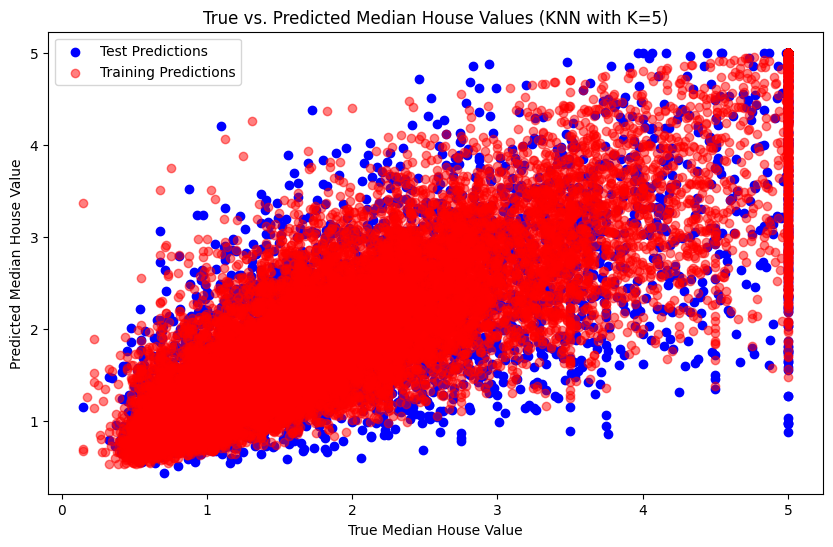

In [280]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Test Predictions')
plt.scatter(y_train, train_predictions, color='red', alpha=0.5, label='Training Predictions')
plt.title('True vs. Predicted Median House Values (KNN with K=5)')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.show()

4. Test Runtime: The time taken for predicting the test set was about 5.85 seconds, and for the training set, it was 16.97 seconds. These runtimes are reasonable for a KNN implementation on a dataset of this size and complexity, especially considering the computational overhead of calculating distances to all training points for each test and training instance.
5. Compared to the baseline model in part 1.4, which had an RMSE of approximately 1.001 for the test dataset, the KNN algorithm with K=5 has significantly improved prediction accuracy. This indicates that a more complex model that considers the nearest neighbors according to specific features can provide more accurate predictions than simpler baseline models based on average values or categorical distinctions.
In terms of runtime, the KNN algorithm is expectedly slower than the baseline models due to the computational cost of distance calculations and sorting to find the nearest neighbors for each instance. However, the runtime is still within a practical range, demonstrating an efficient implementation.

### 2.5 Cross-Validation

I will implement a simple 20-fold cross-validation algorithm to determine the optimal choice of K while avoiding overfitting. Since the function(s) I write here will be used multiple times throughout this problem set, I will ensure my implementation is as efficient as possible.

Here’s what I will do:

1. Randomly divide my training dataset (created in 1.2) into 20 equally-sized samples.
2. For each of the 20 iterations (the "folds"):
- Use 19 samples as the "training data" (even though k-NN doesn’t involve training).
- Use the remaining 1 sample as the validation set.
- Compute the RMSE for that validation set.
3. Report the average RMSE across the 20 iterations and compare it to the result obtained in 2.3.
4. Report the total runtime for the 20-fold cross-validation process and compare it to previous results.


I will use MedIncNorm, HouseAgeNorm, and AveRoomsNorm as features and set K=5, using Euclidean distance for all calculations.

In [281]:
def k_fold_cross_validation(X, y, K=5, L=2, n_folds=20):
    n_samples = X.shape[0]
    fold_size = n_samples // n_folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    rmse_scores = []
    
    start_time = time.time()
    
    for i in range(n_folds):
        # Determine the indices for the validation set
        val_indices = indices[i*fold_size : (i+1)*fold_size]
        # The rest are training indices
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
        
        # Prepare the training and validation sets
        X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
        y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]
        
        # Use the KNN model to predict on the validation set
        val_predictions = predict_K_nearest(X_train, X_val, y_train, K, L)
        
        # Calculate the RMSE for the current fold
        rmse = compute_rmse(val_predictions, y_val)
        rmse_scores.append(rmse)
    
    # Calculate the average RMSE across all folds
    avg_rmse = np.mean(rmse_scores)
    total_time = time.time() - start_time
    
    return avg_rmse, total_time

# Prepare the data
features = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm']
X_train = cal_df_train_copy[features]
y_train = cal_df_train_copy['MedHouseVal']

# Perform 20-fold cross-validation
avg_rmse, total_runtime = k_fold_cross_validation(X_train, y_train, K=5, L=2, n_folds=20)

print(f"Average Cross-Validated RMSE: {avg_rmse}")
print(f"Total Runtime: {total_runtime} seconds")

Average Cross-Validated RMSE: 0.7887239212691044
Total Runtime: 16.403558015823364 seconds


1. **Average Cross-validated RMSE**: 0.789, comparing to the test RMSE of about 0.795 for K=5 with the same set of features in a non-cross-validated setting. The slightly lower average cross-validated RMSE suggests that the KNN model generalizes well across different subsets of the data. Cross-validation, by assessing the model across various unique data samples, offers a more robust and somewhat optimistic performance metric, averaging out high and low error rates that might result from the particularity of a single split. 
2. **Cross-validation Runtime**: About 16.403 seconds for 20 times re-running the KNN process across 20 different data splits. Cross-validation's result, while marginally better, consolidates the message from the prior stand-alone experiment, with the time cost recorded underscoring the data-learn paradigm's computationally meager manner. This might project it as a worse handicap if we target larger, more life-like extents in our uses. 

### 2.6 Using cross validation to find the optimal value for K

I will determine the optimal value of 𝐾 for the K-nearest neighbors (KNN) model by computing the cross-validated RMSE for values of 𝐾 between 1 and 25 using 10-fold cross-validation with L2 normalization.

Steps:
- Cross-validation for different values of 𝐾:

1. I will perform 10-fold cross-validation for each K value from 1 to 25.
2. I will use MedIncNorm, HouseAgeNorm, and AveRoomsNorm as features.
3. I will calculate the cross-validated RMSE for each K.
4. I will create a graph showing how RMSE changes as K increases from 1 to 25.

- Final model training and testing:

1. I will "train" (store the training data) a KNN model using the value of K that minimized the cross-validated RMSE.
2. I will compute and report the test RMSE using this optimal K.
3. I will compare the test RMSE with the cross-validated RMSE and analyze whether the results match expectations.
 

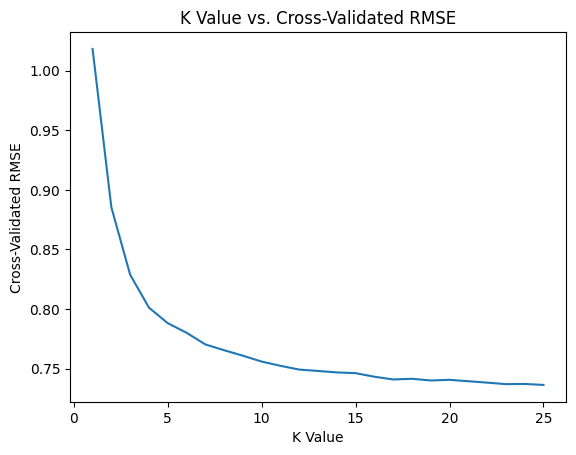

optimal_test_predictions RMSE: 0.736587748445116
optimal_test_predictions: 16.278357982635498 seconds


In [282]:
k_rmse_scores = []
for K in range(1, 26):
    avg_rmse, _ = k_fold_cross_validation(X_train, y_train, K=K, L=2, n_folds=10)
    k_rmse_scores.append(avg_rmse)

# Plotting RMSE vs. K
plt.plot(range(1, 26), k_rmse_scores)
plt.xlabel('K Value')
plt.ylabel('Cross-Validated RMSE')
plt.title('K Value vs. Cross-Validated RMSE')
plt.show()

# Determine optimal K 
optimal_K = range(1, 26)[np.argmin(k_rmse_scores)]

# Perform 20-fold cross-validation with the optimal K
optimal_K_rmse, optimal_test_predictions = k_fold_cross_validation(X_train, y_train, K=optimal_K, L=2, n_folds=20)

print(f"optimal_test_predictions RMSE: {optimal_K_rmse}")
print(f"optimal_test_predictions: {optimal_test_predictions} seconds")





The optimal value of K determined from cross-validation led to a Test RMSE of 0.737, which indicates that the model, when applied to unseen data (the test set), has a good level of predictive accuracy. 